In [1]:
import gym
import gridworlds
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv

In [5]:
class Agent():
    def __init__(self, env, epsilon, alpha, gamma, decay_factor, render=False):
        self.env = env
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.decay_factor = decay_factor
        self.render = render      
        self.Q = np.zeros([env.env.height, env.env.width, env.env.action_space.n])
        
        reward_pos = env.config['start_position']
        terminal_pos = env.config['reward_position']
        self.state_list = np.indices((env.env.height, env.env.width)).transpose(1, 2, 0).reshape(-1, 2).astype(str)
        
        self.state_list = [', '.join(ele) for ele in self.state_list]       
        self.action_list = ["UP", "RIGHT", "DOWN", "LEFT"]

            
    def epsilon_greedy(self, state):
        p = np.random.uniform()
        
        if p <= 1-self.epsilon:
            # choose optimal action, if several optimal actions, action is choosen randomly between them
            actions = self.Q[state[0], state[1], :]
            return np.random.choice(np.flatnonzero(actions == actions.max())) 
            
        else:
            # choose random between actions
            return env.env.action_space.sample()
        
    def q_learning(self, state, action, suc_state, reward):
        max_q_suc = np.max(self.Q[suc_state[0], suc_state[1], :])
        current_q = self.Q[state[0], state[1], action]
        
        # update action-value according to Q-learning
        self.Q[state[0], state[1], action] = current_q + self.alpha * (reward + self.gamma * max_q_suc - current_q)

        
    def train_agent(self, episodes, max_timesteps):
        steps = np.zeros(episodes)
        print('[INFO] - Training of the Agent started.')
        
        for episode in range(episodes):
            state = self.env.reset()
                        
            for t in range(max_timesteps):  # cap timesteps
                action = self.epsilon_greedy(state)        
                suc_state, reward, done, _ = self.env.step(action)
                
                self.q_learning(state, action, suc_state, reward)
                state = suc_state
                
                if self.render == True: self.env.render()

                if done:
                    steps[episode] = t+1    # starts at 0
                    break
            
            if self.epsilon >= 0.0005:
                self.epsilon -= self.decay_factor            
            
            if episode%50 == 0 and episode != 0:
                self.plot_q(episode)
                
        if self.render == True: env.close() # env.close not implemented
            
        print(f'[INFO] - Finished training with epsisode: {episode}.')
        self.plot_q(episode)
        self.plot_steps(steps)
        
        print('[INFO] - Running agent with optimal policy.')
        self.behave_optimal()

        print('[INFO] - Finished training.')
            
        return self.Q
    
    def behave_optimal(self):
        state = self.env.reset()
        done = False
        
        while not done:  # max timesteps
            # take optimal action
            actions = self.Q[state[0], state[1], :]
            action = np.random.choice(np.flatnonzero(actions == actions.max()))
            
            suc_state, reward, done, _ = self.env.step(action)

            state = suc_state

            self.env.render()
    
        cv.destroyAllWindows()
    
    def plot_q(self, episode):
        y_labels = self.state_list.copy()        
        fig, ax = plt.subplots(figsize=(10,10))
        ax = sns.heatmap(self.Q.reshape((-1, 4)), vmin=np.min(self.Q), vmax=np.max(self.Q), linewidths=.5, annot=True, fmt='.4f', ax=ax)
        ax.set_yticklabels(y_labels, rotation=0)
        ax.set_xticklabels(self.action_list)
        ax.set_title(f'Q-table after episode {episode}.')
        plt.show()
    
    def plot_steps(self, steps):
        fig, ax = plt.subplots()
        ax.plot(steps)
        ax.set(xlabel='Episode', ylabel='Steps', title='Amount of steps taken by the Agent during training')
        plt.show()

In [6]:
env = gym.make('gridworld-v0')

q_learning_agent = Agent(env,
                       alpha=0.1,      # learning rate
                       epsilon=0.4,    # epsilon_greedy
                       gamma=0.9,      # discount factor (0-myopic; 1-far sighted)
                       decay_factor=0.0001,
                       render=False)
                       
print(f'The environment has {env.env.observation_space.n} states and {env.env.action_space.n} actions, with an state space of {env.env.observation_space} and an action space of {env.env.action_space}.')

The environment has 12 states and 4 actions, with an state space of Discrete(12) and an action space of Discrete(4).


[INFO] - Training of the Agent started.


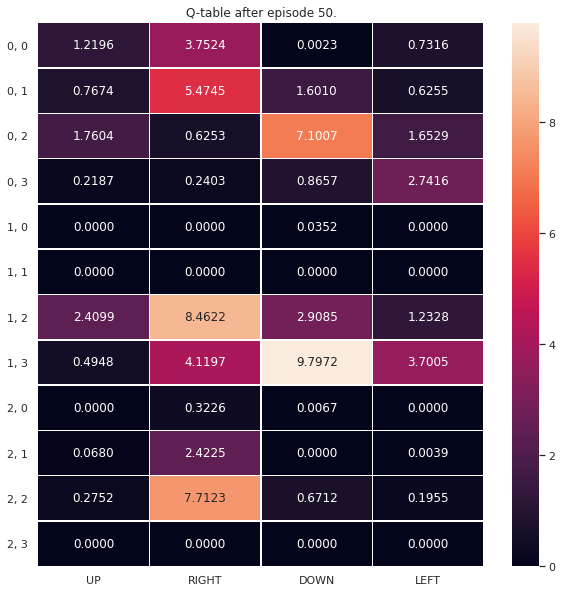

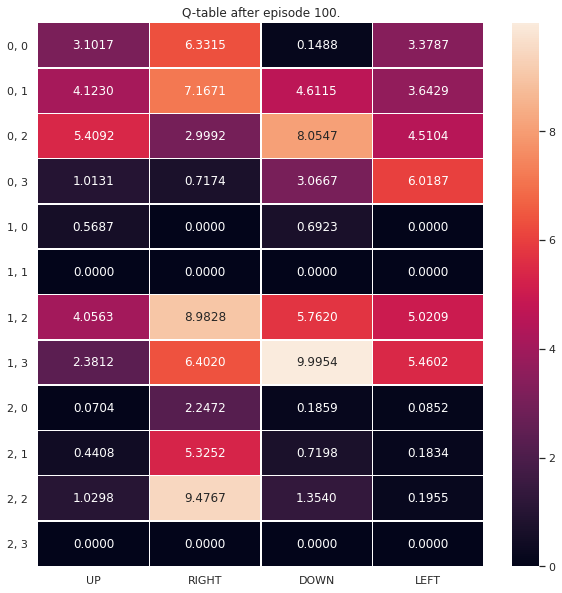

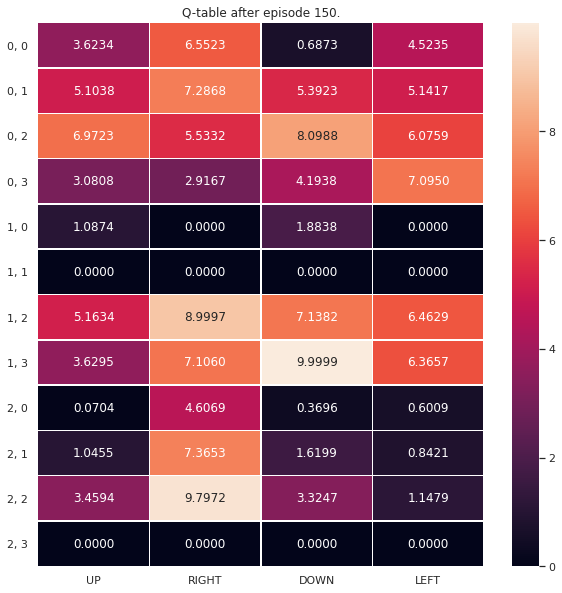

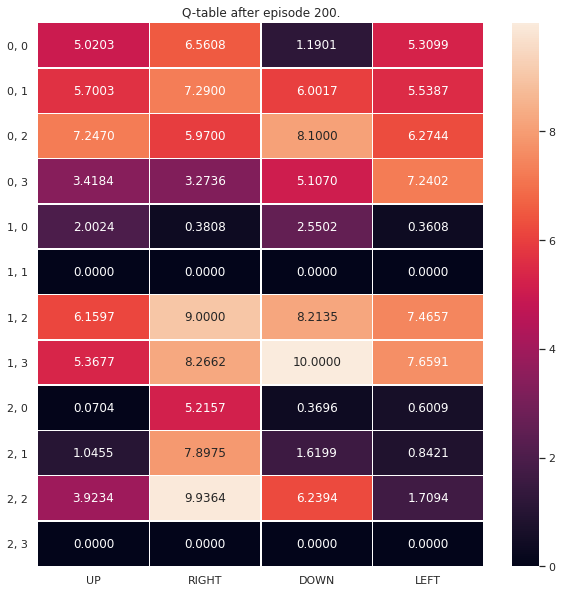

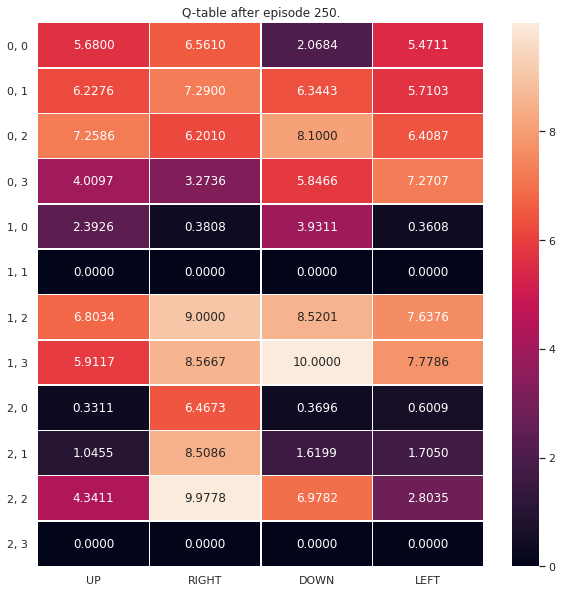

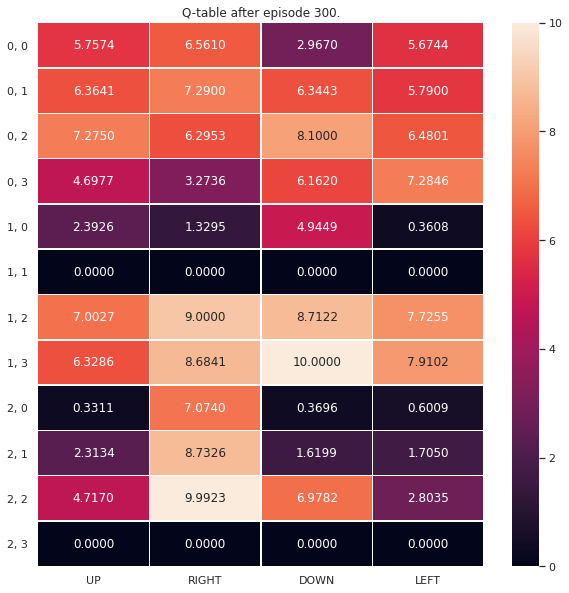

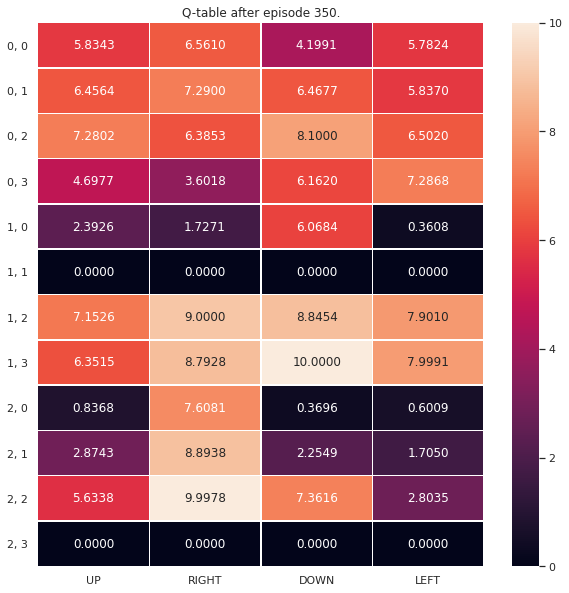

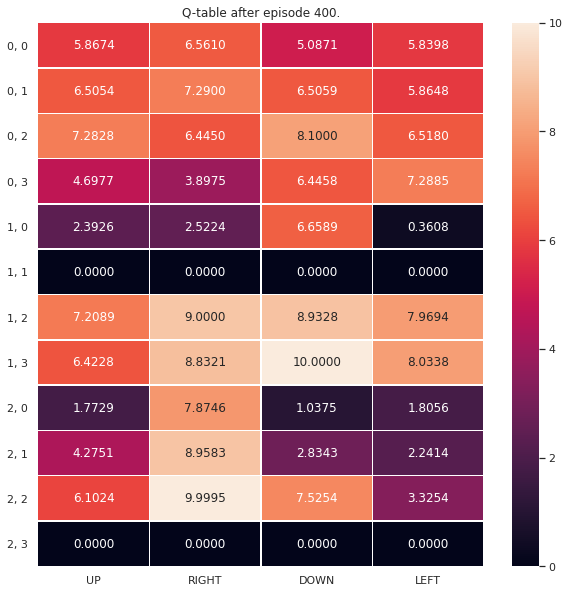

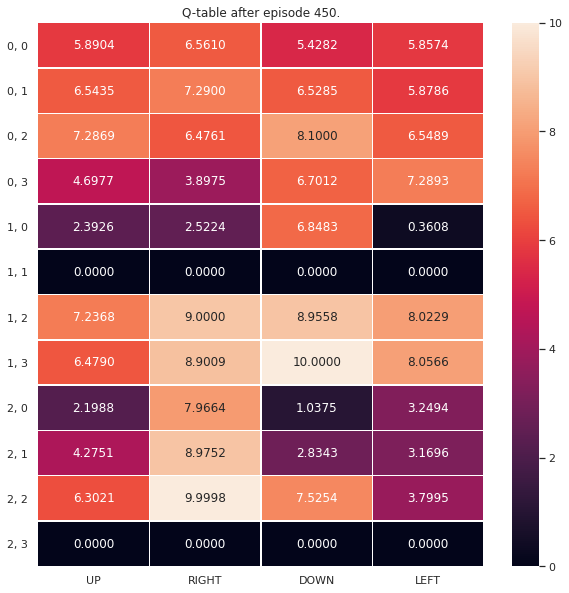

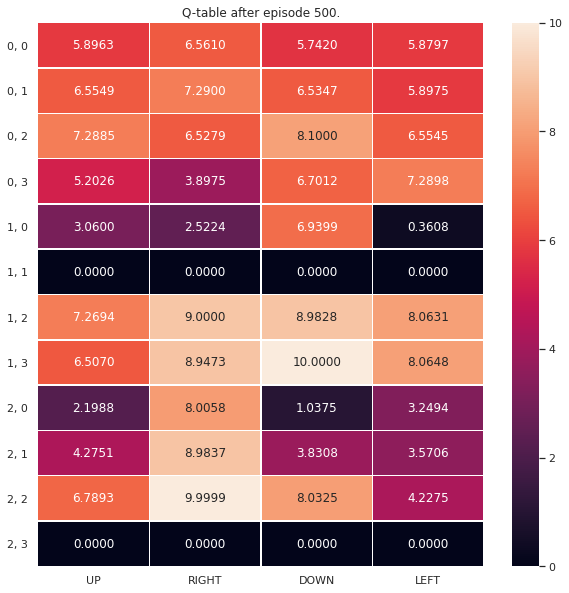

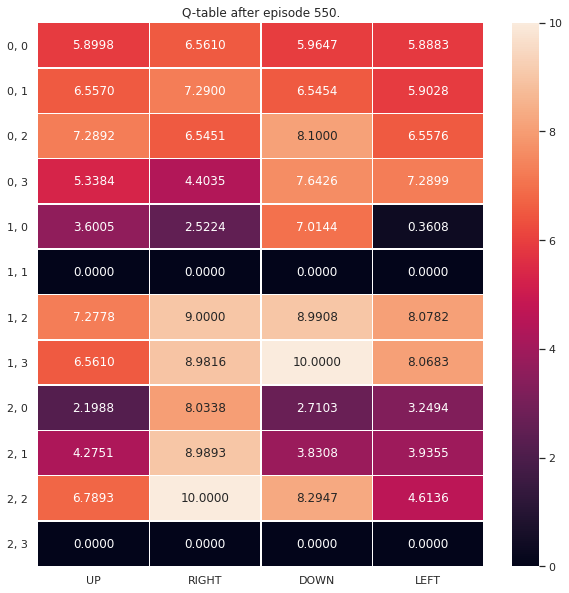

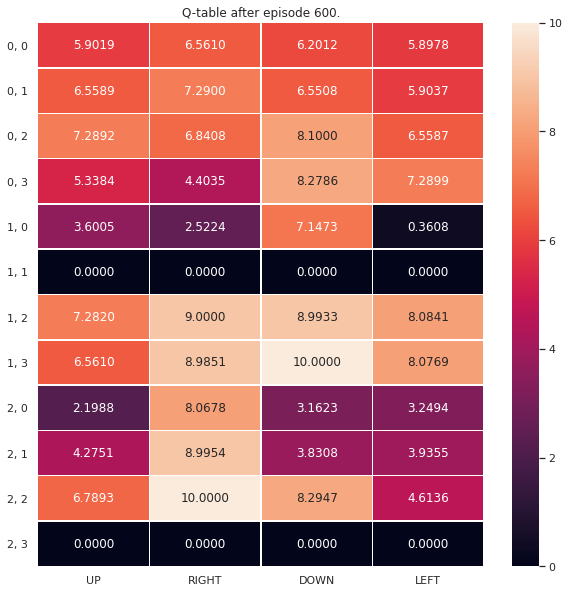

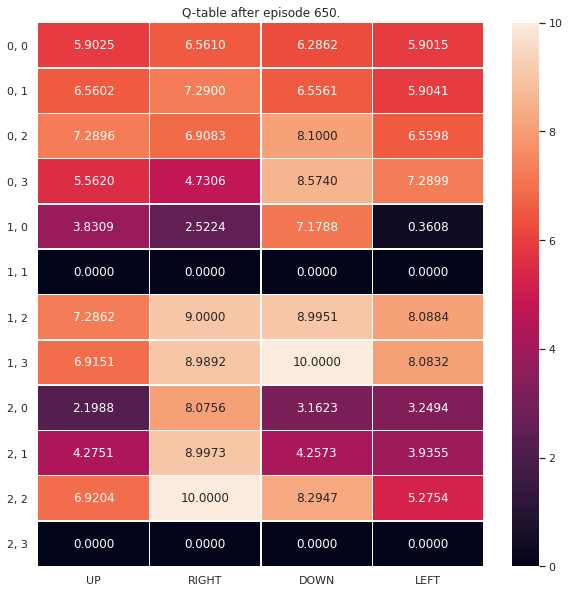

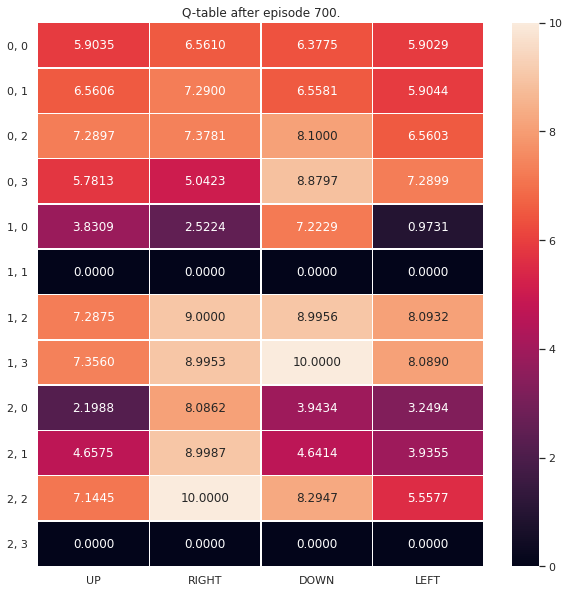

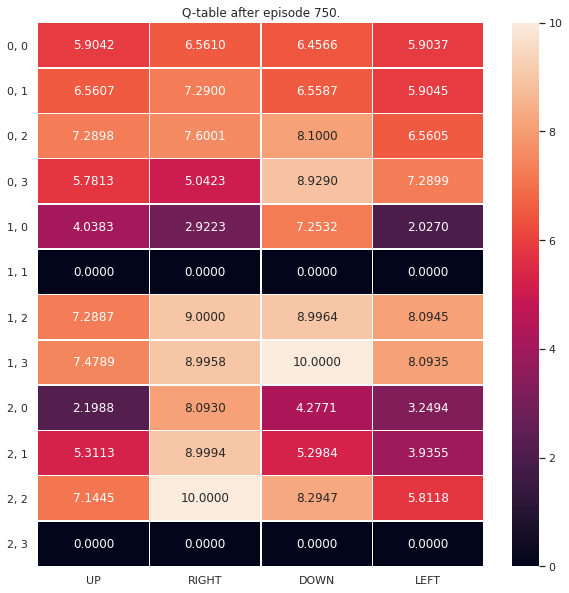

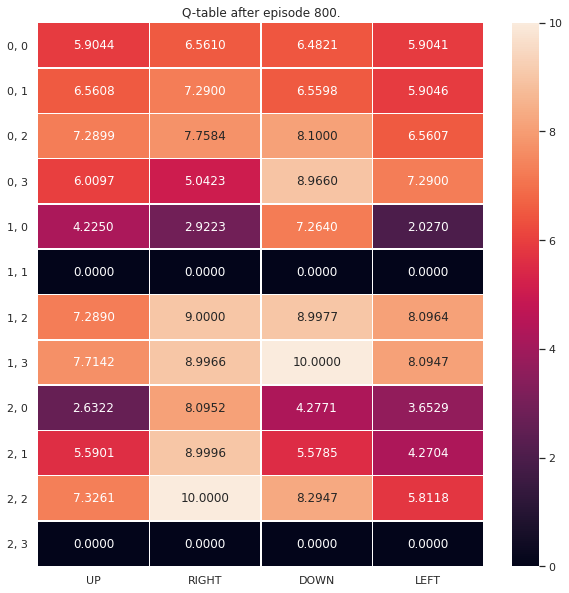

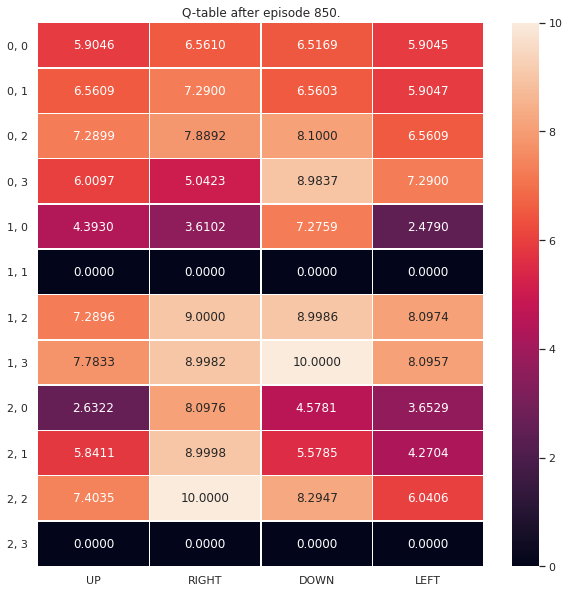

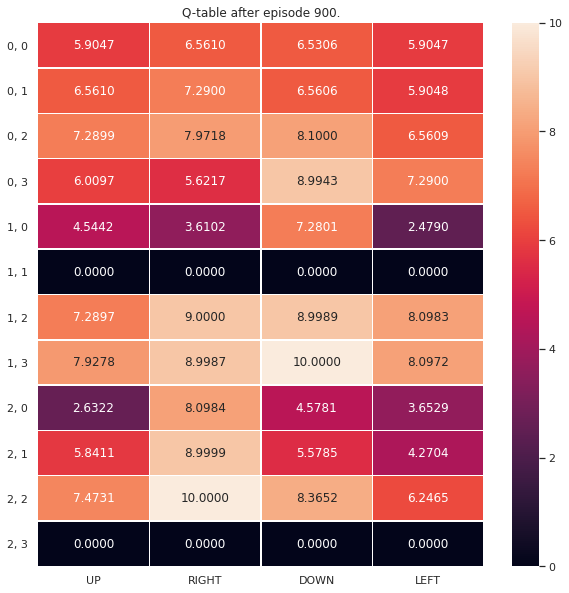

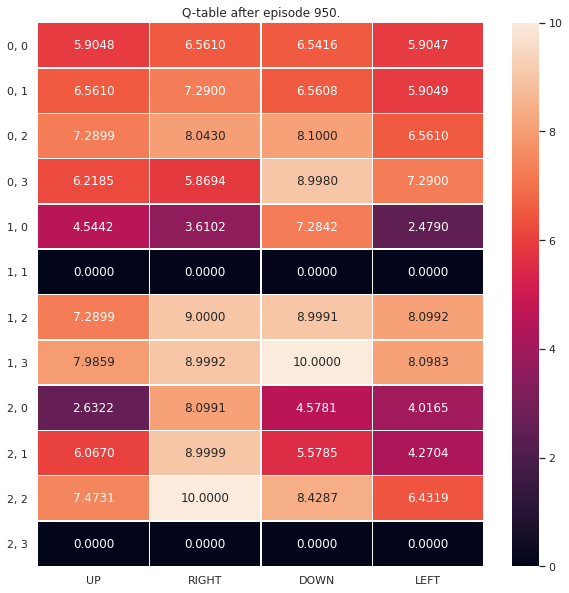

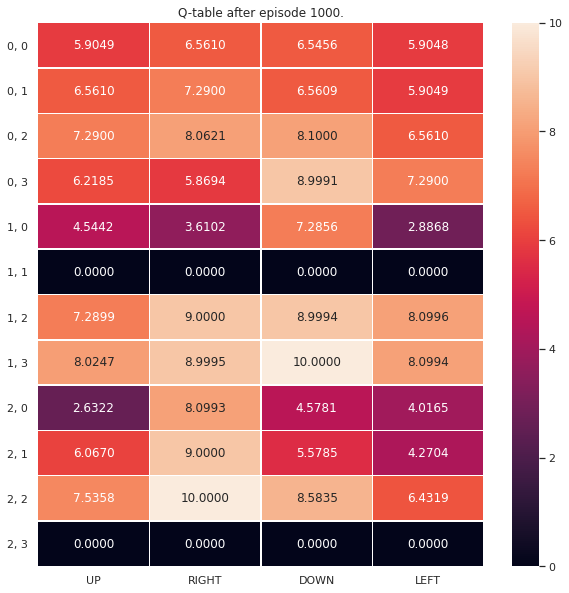

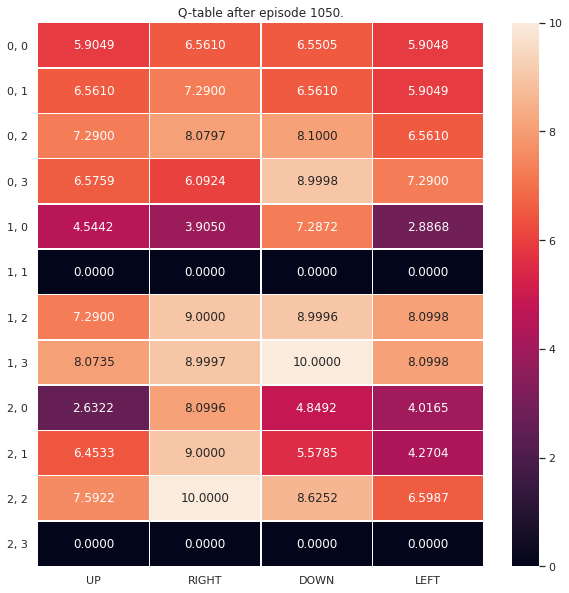

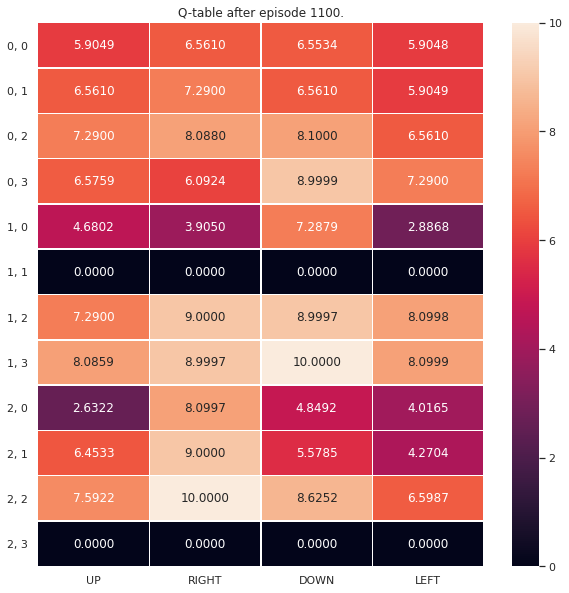

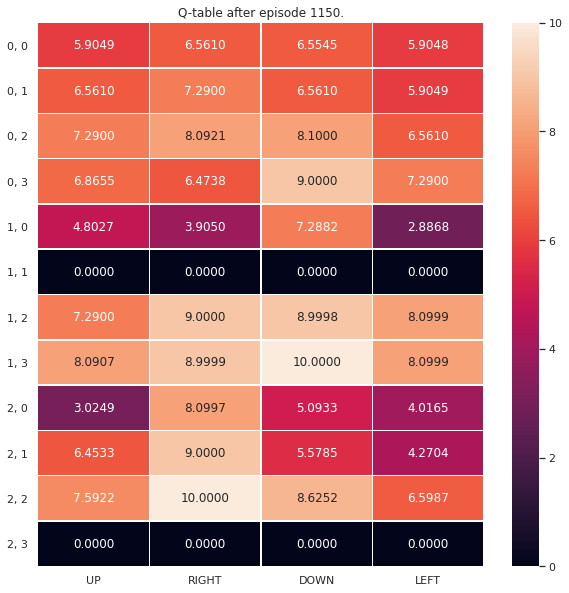

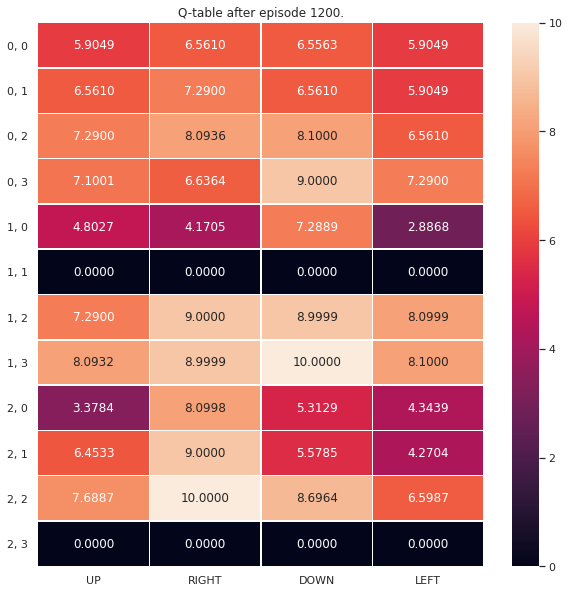

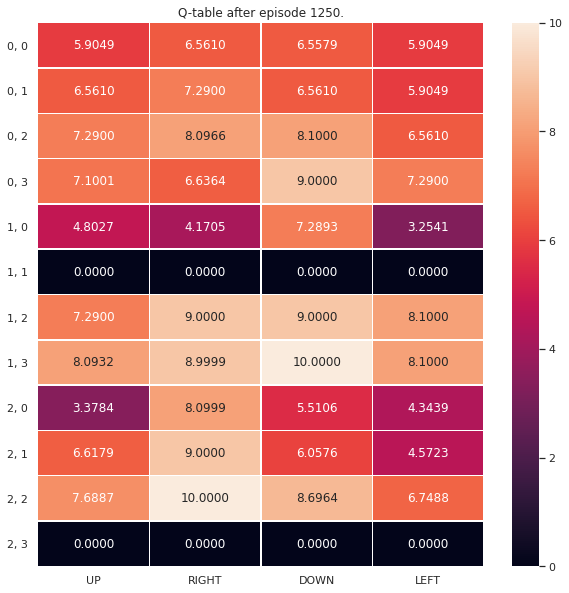

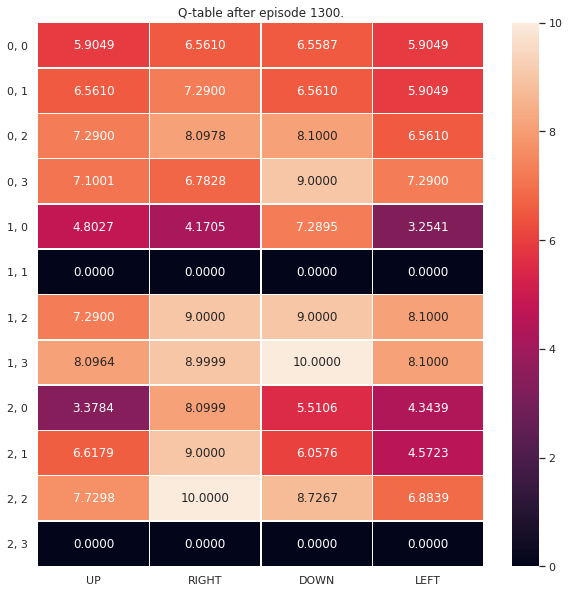

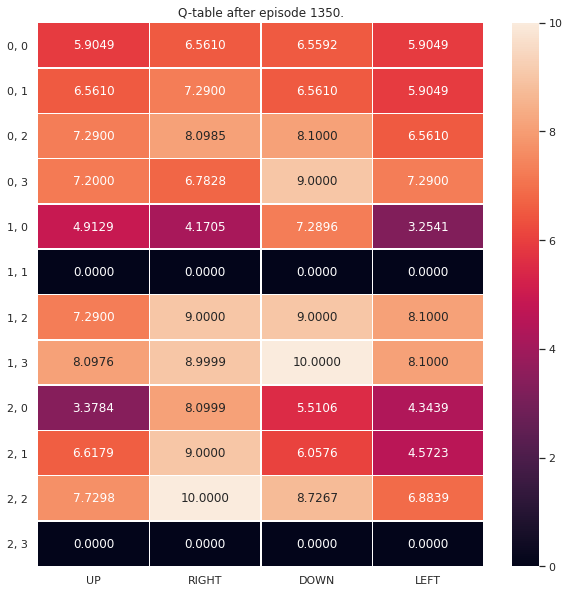

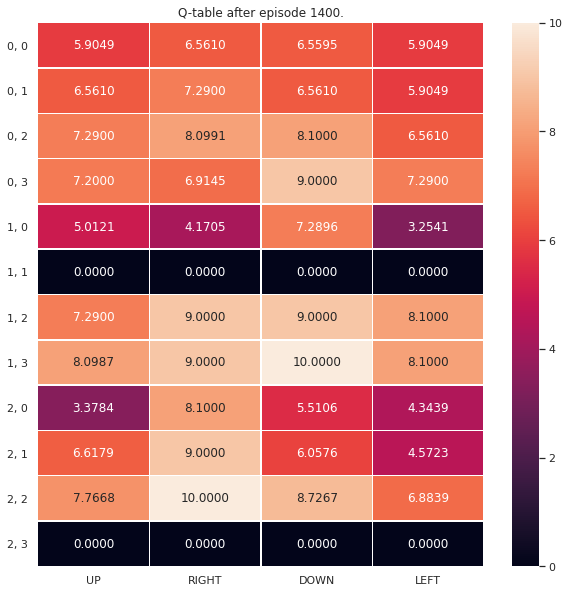

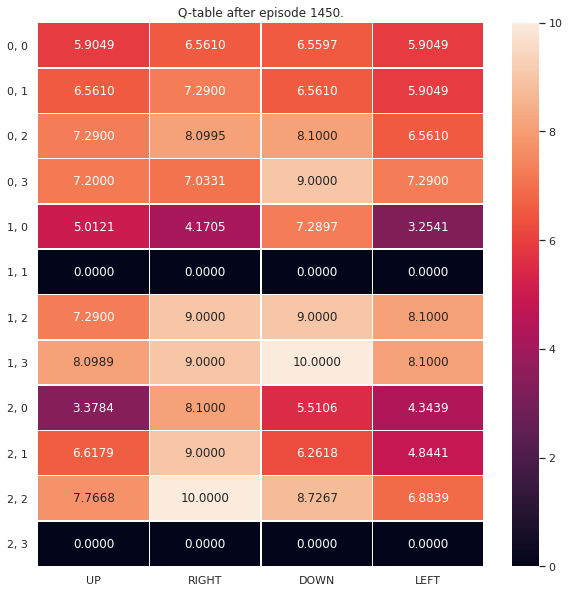

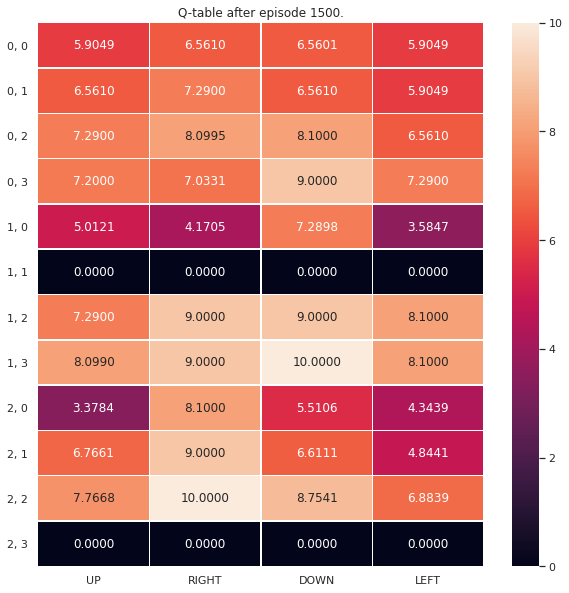

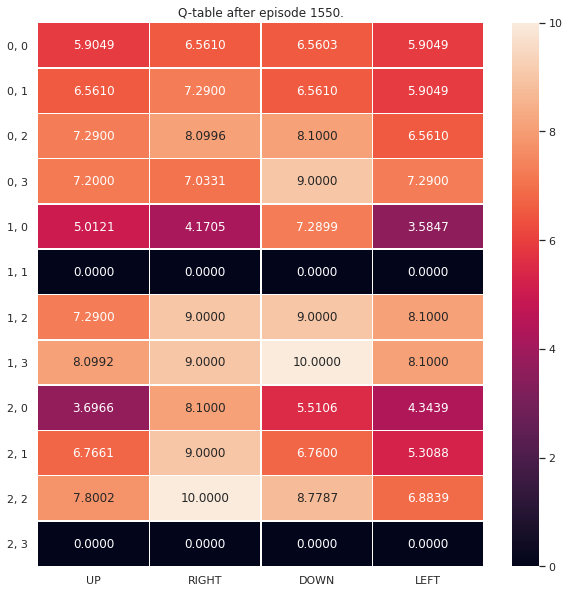

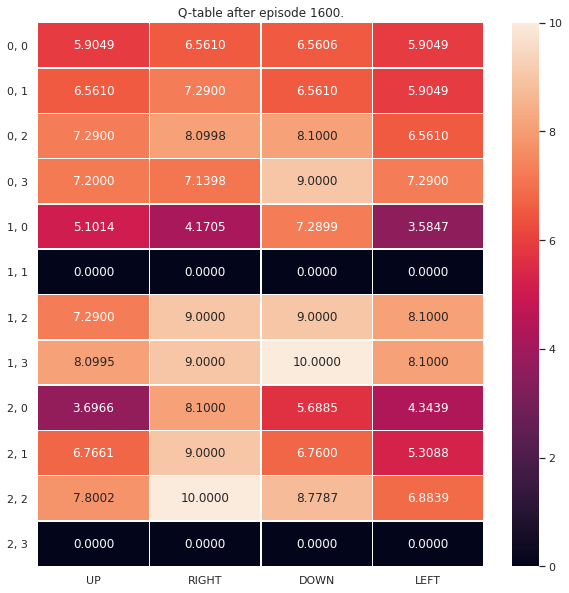

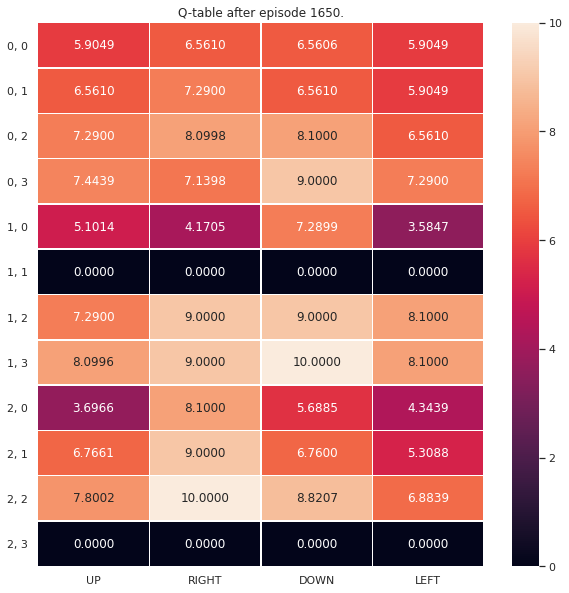

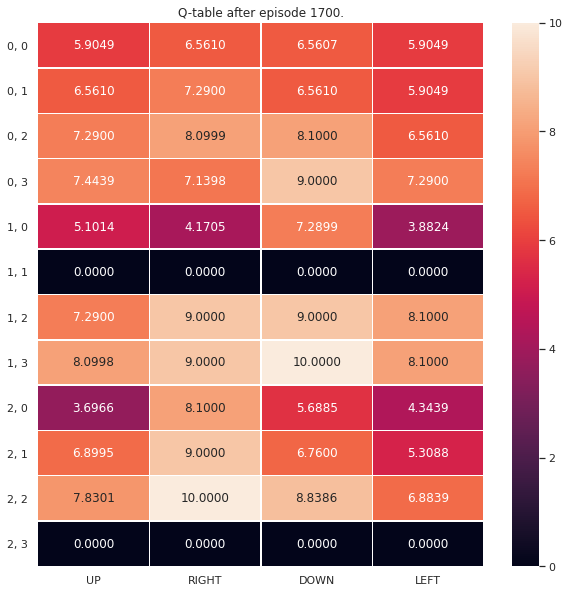

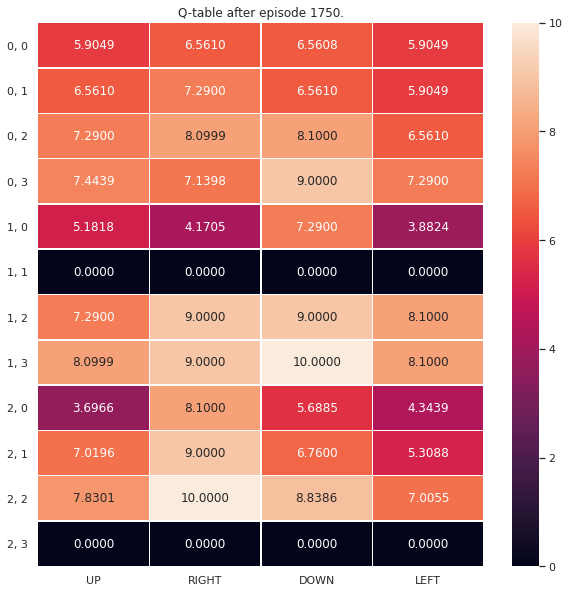

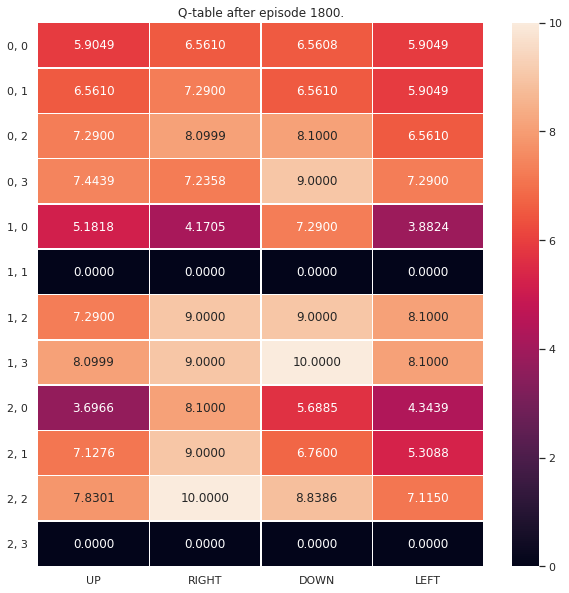

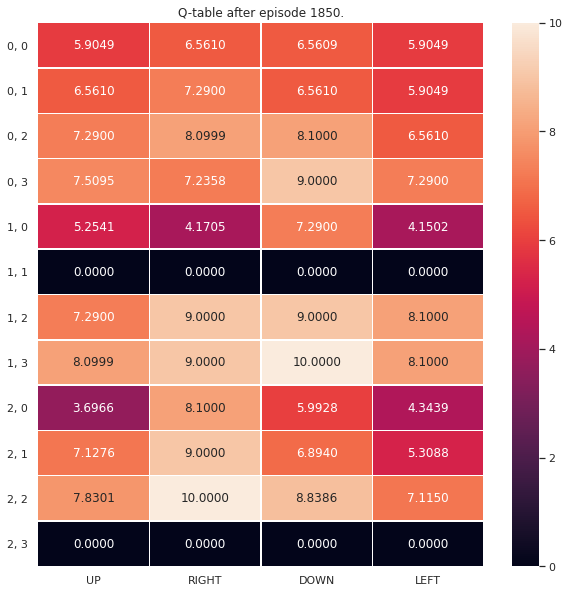

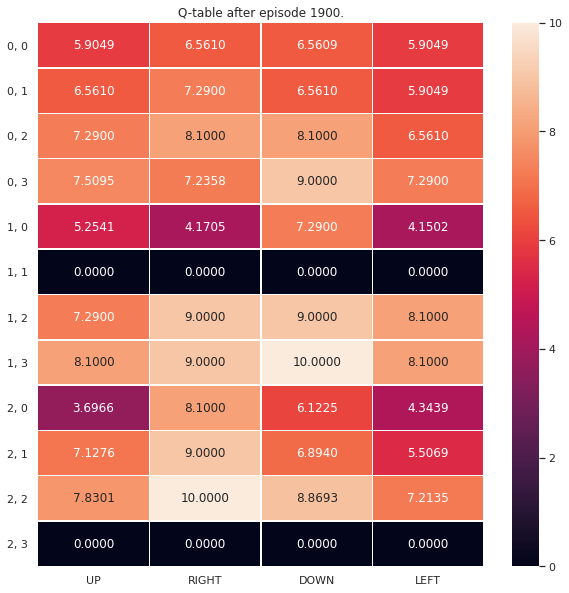

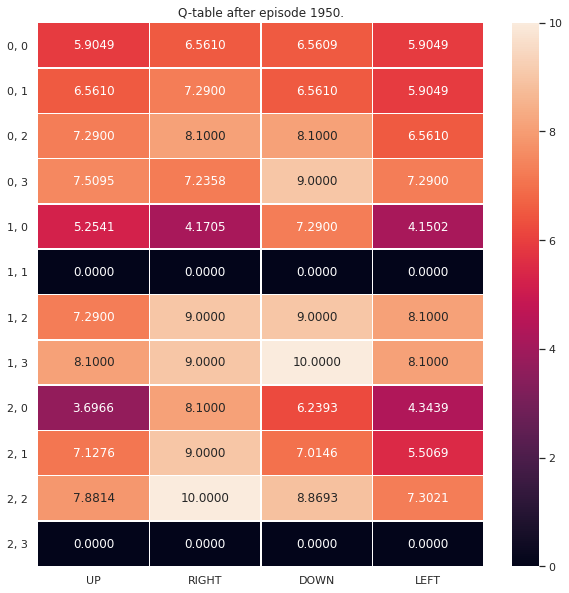

[INFO] - Finished training with epsisode: 1999.


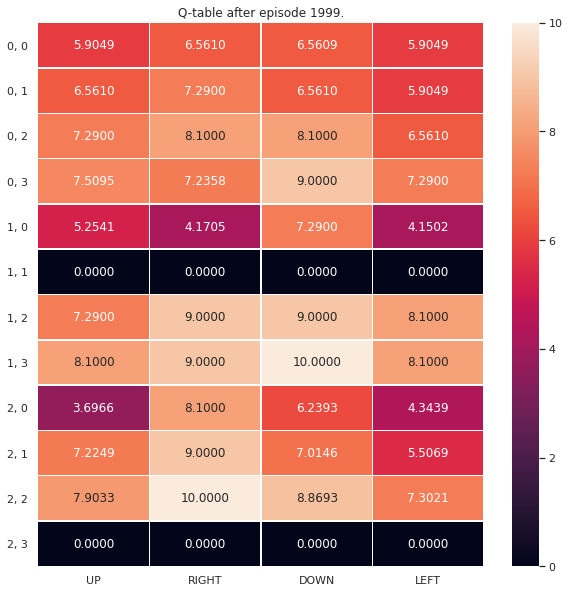

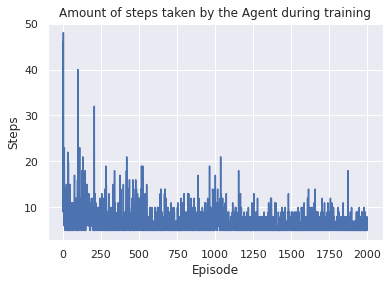

[INFO] - Running agent with optimal policy.
[INFO] - Finished training.


In [7]:
v_star = q_learning_agent.train_agent(episodes=2_000,
                                max_timesteps=100)